# Task 1: Introduction


This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [1]:
import tensorflow as tf

# tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.1.0


# Task 2: The Dataset
### Import MNIST

In [2]:

from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [3]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)




### Plot an Image Example

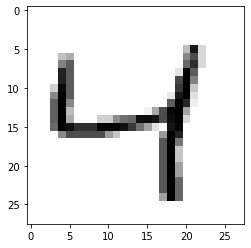

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[2], cmap='binary')
plt.show()

### Display Labels

In [5]:
y_train[2]

4

In [6]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [8]:
print("y_test_encoded shape: ",y_test_encoded.shape)
print("y_train_encoded shape: ",y_train_encoded.shape)

y_test_encoded shape:  (10000, 10)
y_train_encoded shape:  (60000, 10)


### Display Encoded Labels

In [9]:
y_train_encoded[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Task 4: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [10]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

print("x_train_reshaped shape: ", x_train_reshaped.shape)
print("x_test_reshaped shape: ",x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


### Display Pixel Values

In [11]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [23]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10 #Some constant
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

### Display Normalized Pixel Values

In [13]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 5: Creating a Model
### Creating the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [15]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 6: Training the Model

### Training the Model

In [16]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3604 - accuracy: 0.8970
Epoch 2/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1792 - accuracy: 0.9480
Epoch 3/3
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1352 - accuracy: 0.9606


### Evaluating the Model

In [17]:
loss, accuracy = model.evaluate(x_test_norm,y_test_encoded)
print('Test set acuraccy:',accuracy*100)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.1258 - accuracy: 0.9636
Test set acuraccy: 96.35999798774719


# Task 7: Predictions

### Predictions on Test Set

In [18]:
preds = model.predict(x_test_norm)
print('Shape of preds: ',preds.shape)

Shape of preds:  (10000, 10)


### Plotting the Results

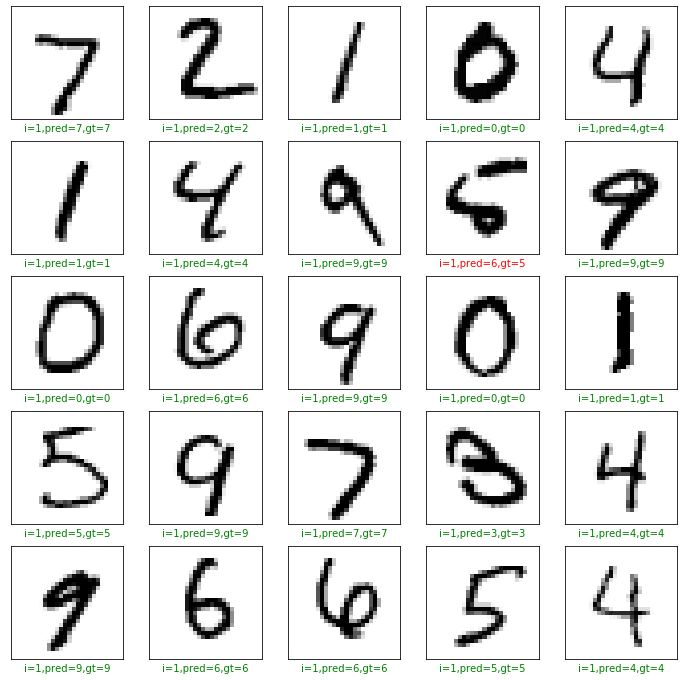

In [22]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred != gt:
        col = 'r'
        
    plt.xlabel('i={},pred={},gt={}'.format(start_index+1,pred,gt),color=col)
    plt.imshow(x_test[start_index+i], cmap='binary')
    
plt.show()

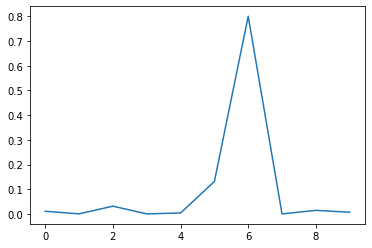

In [20]:
plt.plot(preds[8])
plt.show()